# Assignment Advance Regression
## Assignment Part-I

#### Import Required Libraries

In [14]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1. Load the data and understand the variables

In [15]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Data Inspection

In [16]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# Analyze null value from data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Drop column who have > 35 to 40 % empty fields

Deleting below column:
`Alley`
`FireplaceQu`
`PoolQC`
`Fence`
`MiscFeature`

In [18]:
nullColumn = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

data = data.drop(columns= nullColumn, axis=1)

In [19]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 3 EDA (Visualizing Data)

#### Different Datatype Columns

`Categorical:`
MSSubClass
MSZoning
Street
LandContour
Utilities
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
CentralAir
Electrical
GarageType
GarageFinish
PavedDrive
SaleType
SaleCondition

`Ordered Catagorical:`
LotShape
LandSlope
OverallQual
OverallCond
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
KitchenQual
Functional
GarageQual
GarageCond

`Continuous:`
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold


In [21]:
Categorical_Variables = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
                         'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                         'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
                         'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
Ordered_Categorical_Variables = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
                                 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                 'GarageQual', 'GarageCond']
Continuous_Variables = ['LotFrontage' ,'LotArea' ,'YearBuilt' ,'YearRemodAdd' ,'MasVnrArea' ,'BsmtFinSF1' ,'BsmtFinSF2' ,
                        'BsmtUnfSF' ,'TotalBsmtSF' ,'1stFlrSF' ,'2ndFlrSF' ,'LowQualFinSF' ,'GrLivArea' ,'BsmtFullBath' ,
                        'BsmtHalfBath' ,'FullBath' ,'HalfBath' ,'BedroomAbvGr' ,'KitchenAbvGr' ,'TotRmsAbvGrd' ,'Fireplaces' ,
                        'GarageYrBlt' ,'GarageCars' ,'GarageArea' ,'WoodDeckSF' ,'OpenPorchSF' ,'EnclosedPorch' ,'3SsnPorch' ,
                        'ScreenPorch' ,'PoolArea' ,'MiscVal' ,'MoSold' ,'YrSold']

In [22]:
# Function drawHistogram = To histogram plot in 9 x 3 layout
def drawHistogram(Columns, Number):
    plt.subplot(9,3,Number)
    sns.histplot(data=data[Columns])
    plt.xticks(rotation=90)
    plt.xlabel(Columns, fontsize = 18)
    plt.ylabel('Occurance', fontsize = 18)

### Univariate Analysis

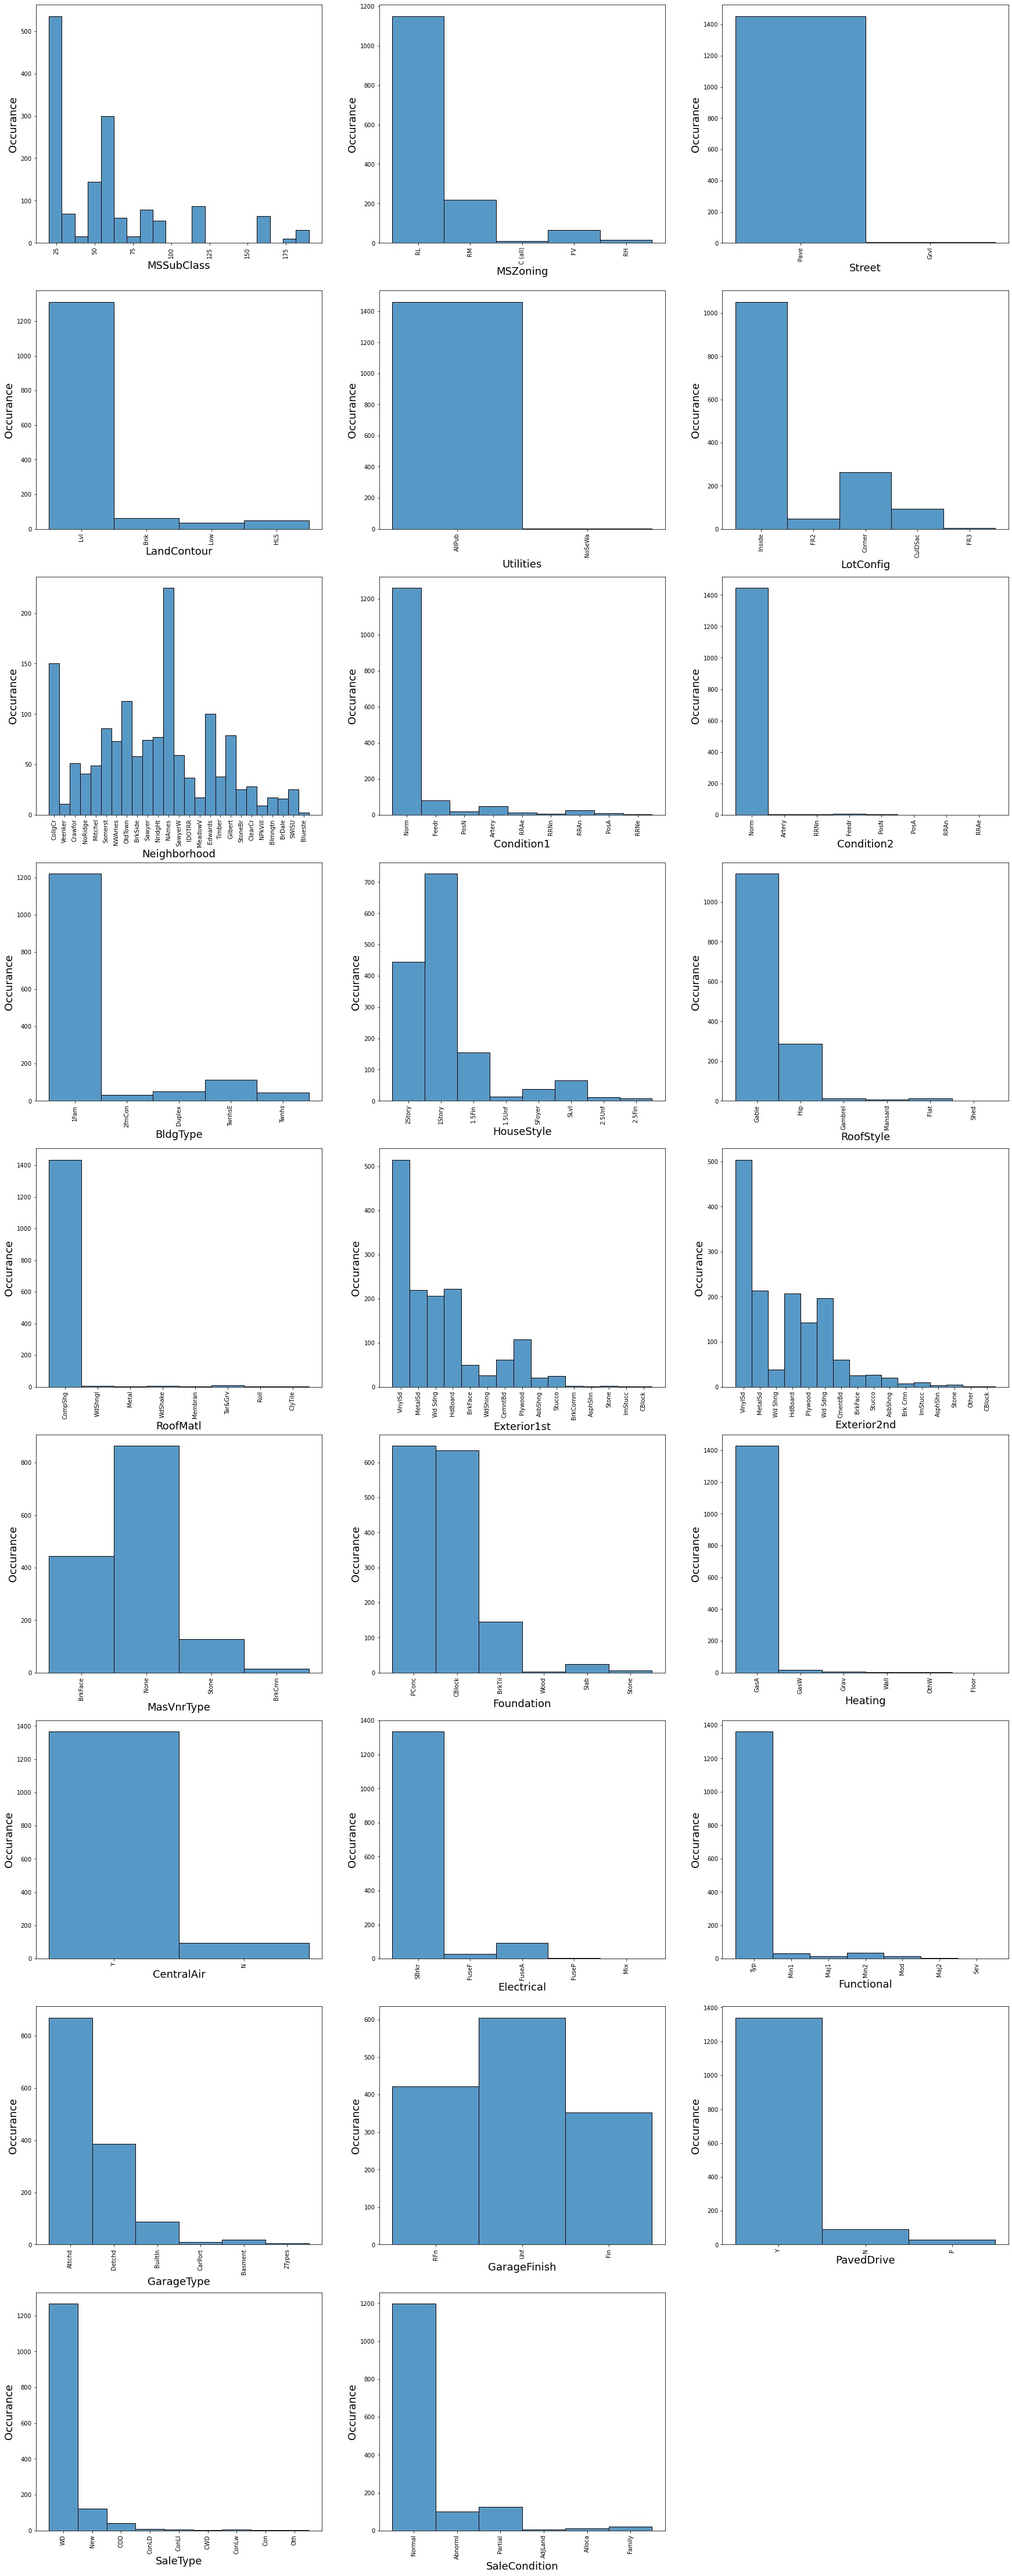

In [23]:
# Catagorical Variable Boxplot
plt.figure(figsize=(30, 80))

i = 1
# Taking Catagorical Variables to draw Histogram
for col in Categorical_Variables:
    drawHistogram(col, i)
    i = i + 1

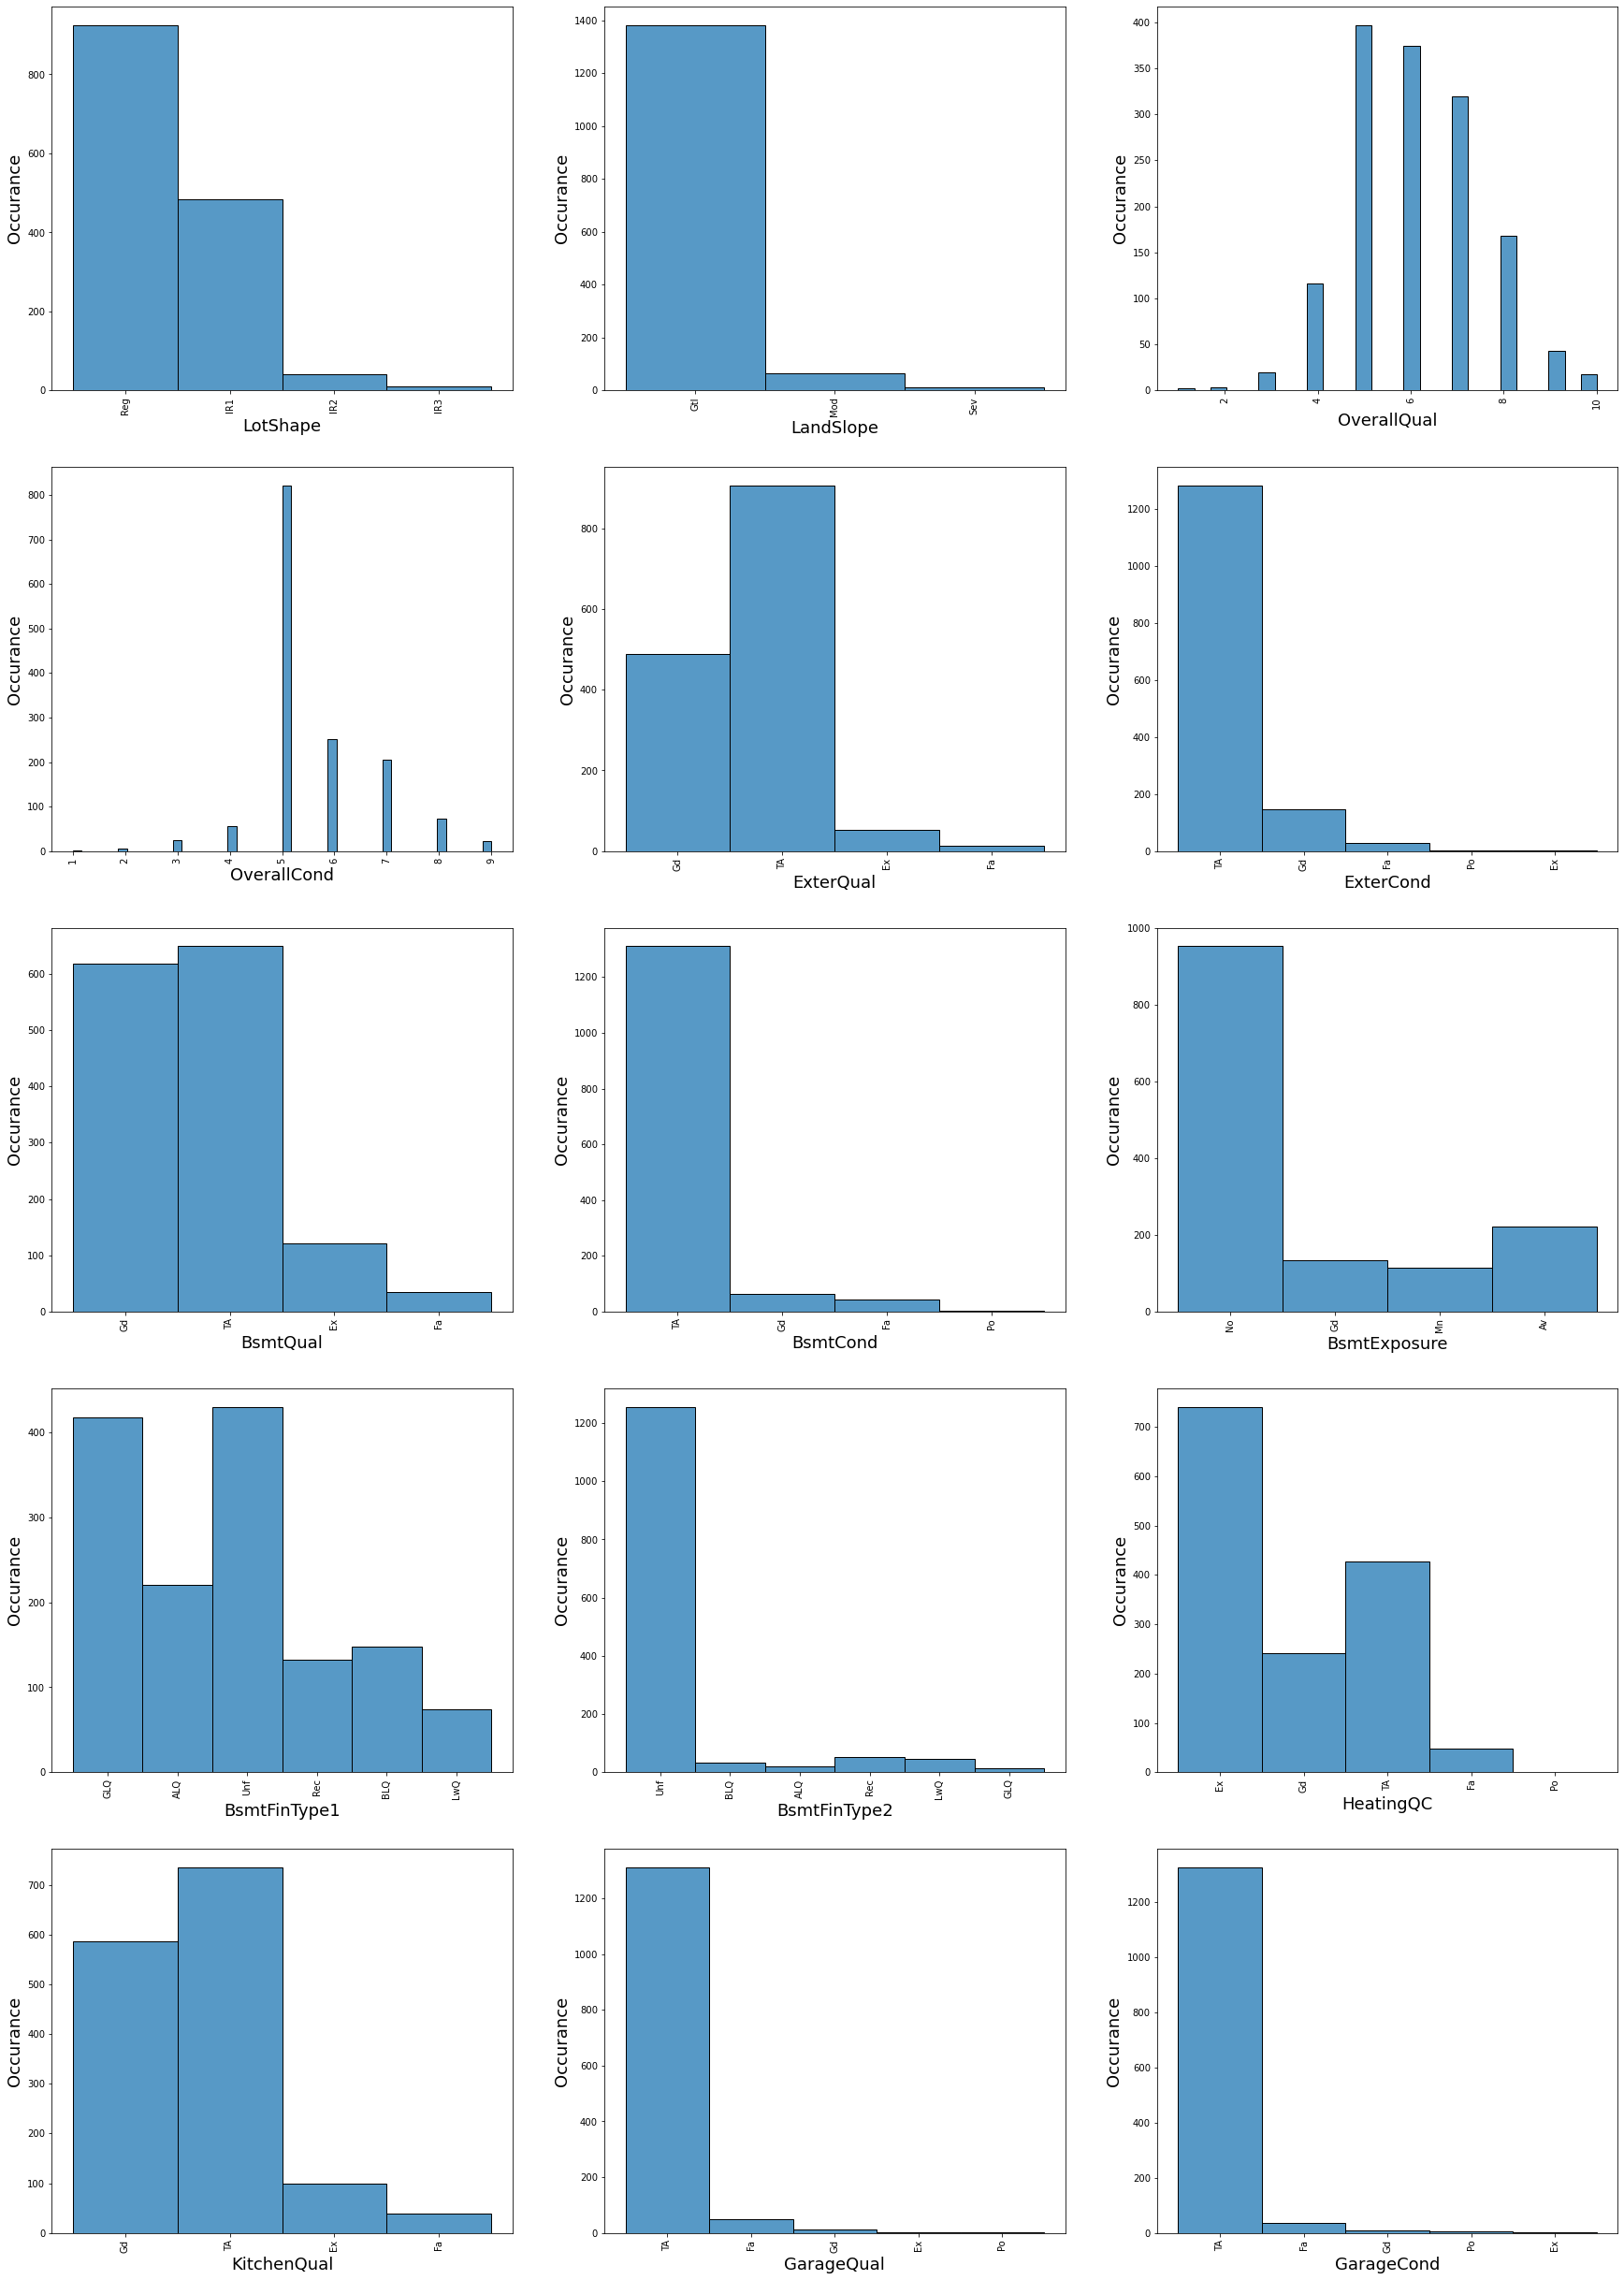

In [24]:
# Ordered Catagorical Variable Boxplot
plt.figure(figsize=(30, 80))

i = 1
# Taking Ordered Catagorical Variables
for col in Ordered_Categorical_Variables:
    drawHistogram(col, i)
    i = i + 1

### Bivariate Analysis

In [25]:
def drawBoxPlot(Column, number):
    plt.subplot(9,3,number)
    sns.boxplot(x = Column, y = 'SalePrice', data = data)
    plt.xticks(rotation=90)
    plt.xlabel(Column, fontsize = 18)
    plt.ylabel('SalePrice', fontsize = 18)

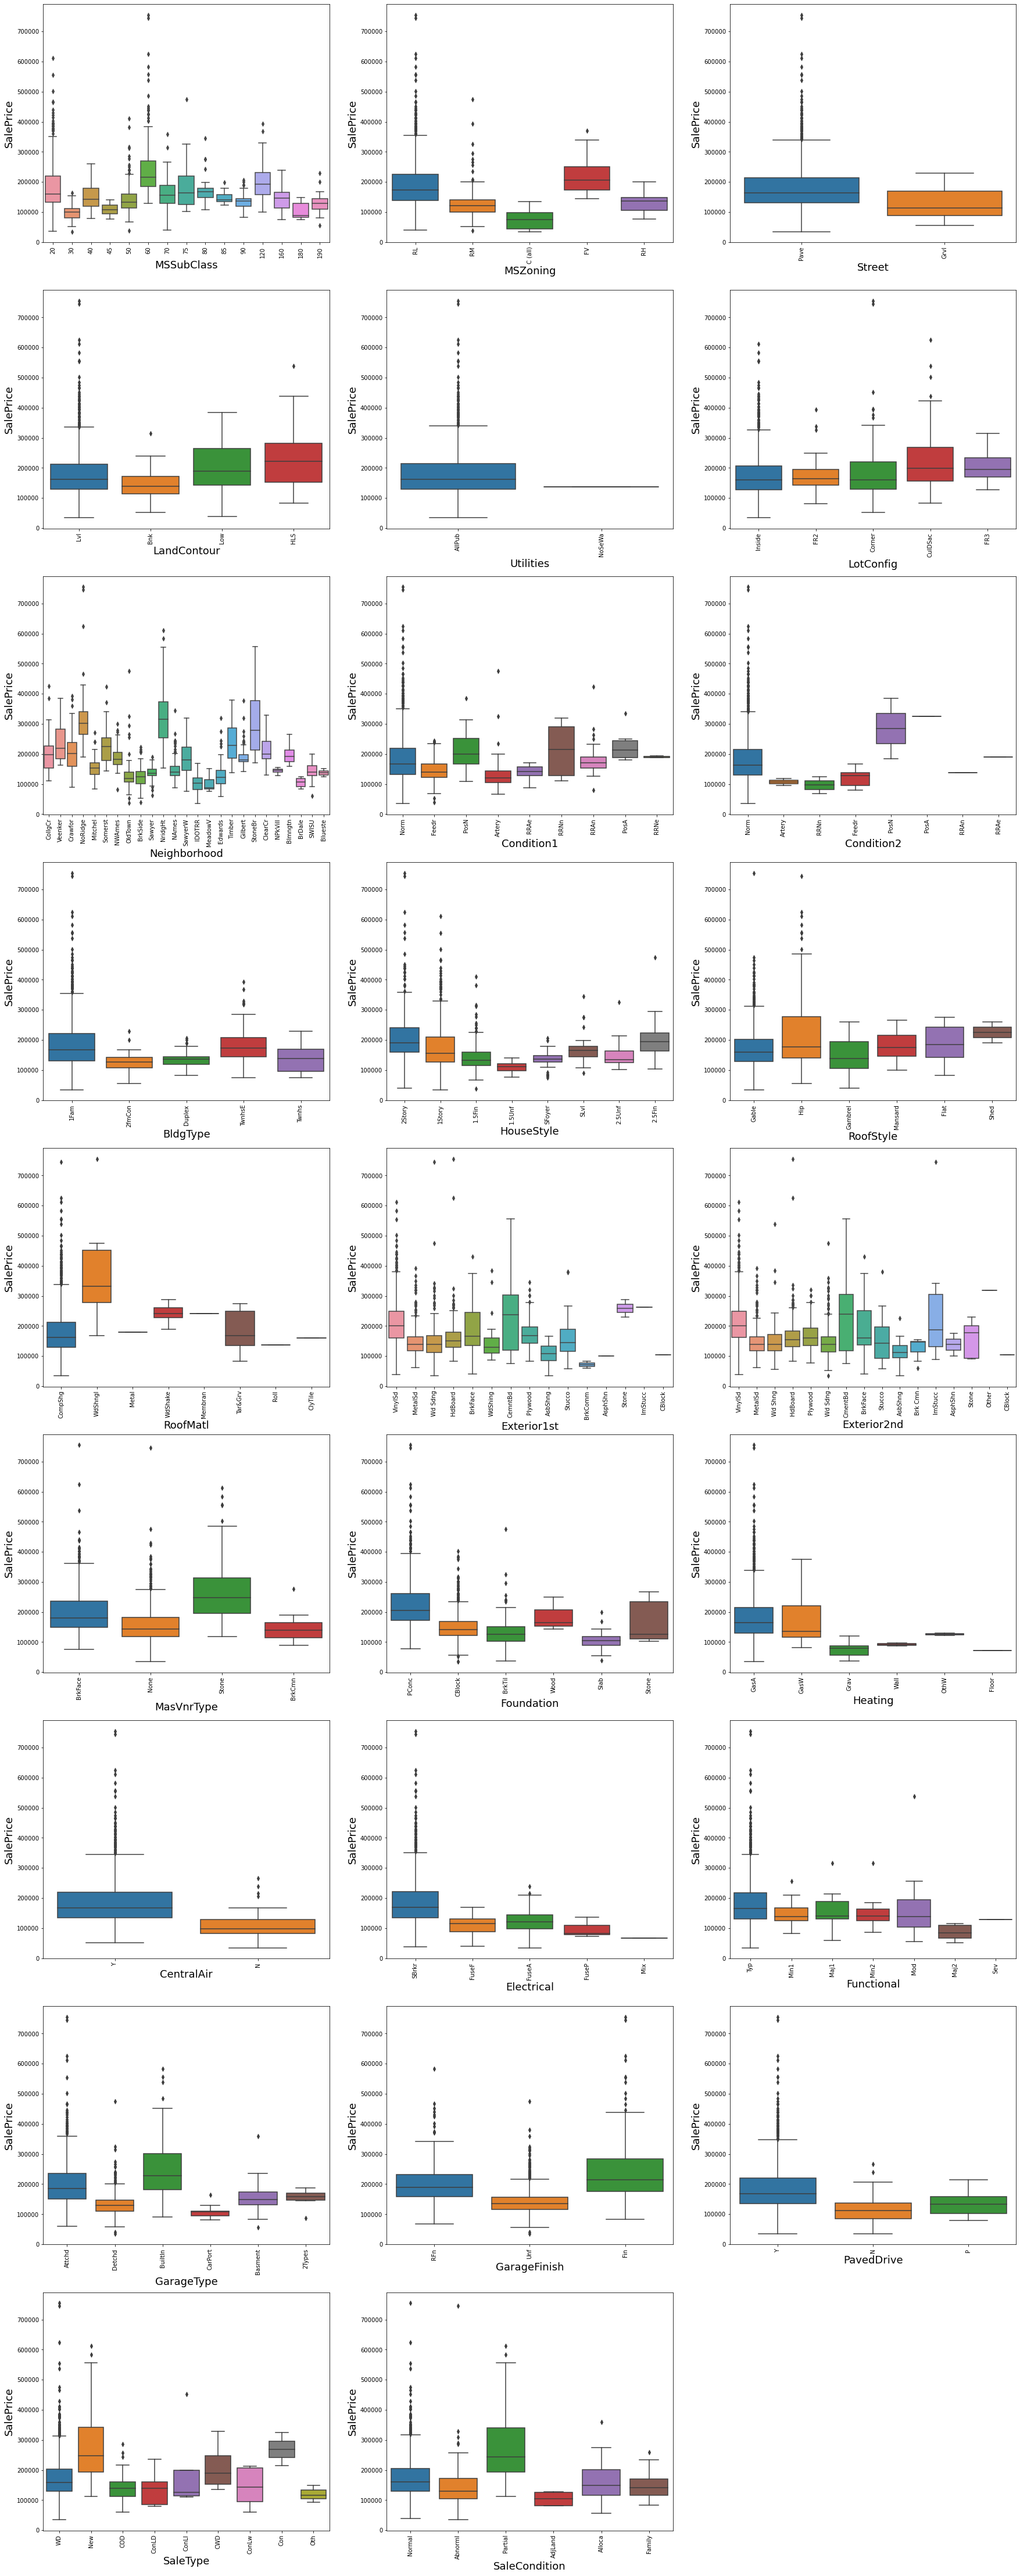

In [26]:
# Catagorical Variable Boxplot
plt.figure(figsize=(30, 80))

i = 1
# Taking Ordered Catagorical Variables
for col in Categorical_Variables:
    drawBoxPlot(col, i)
    i = i + 1

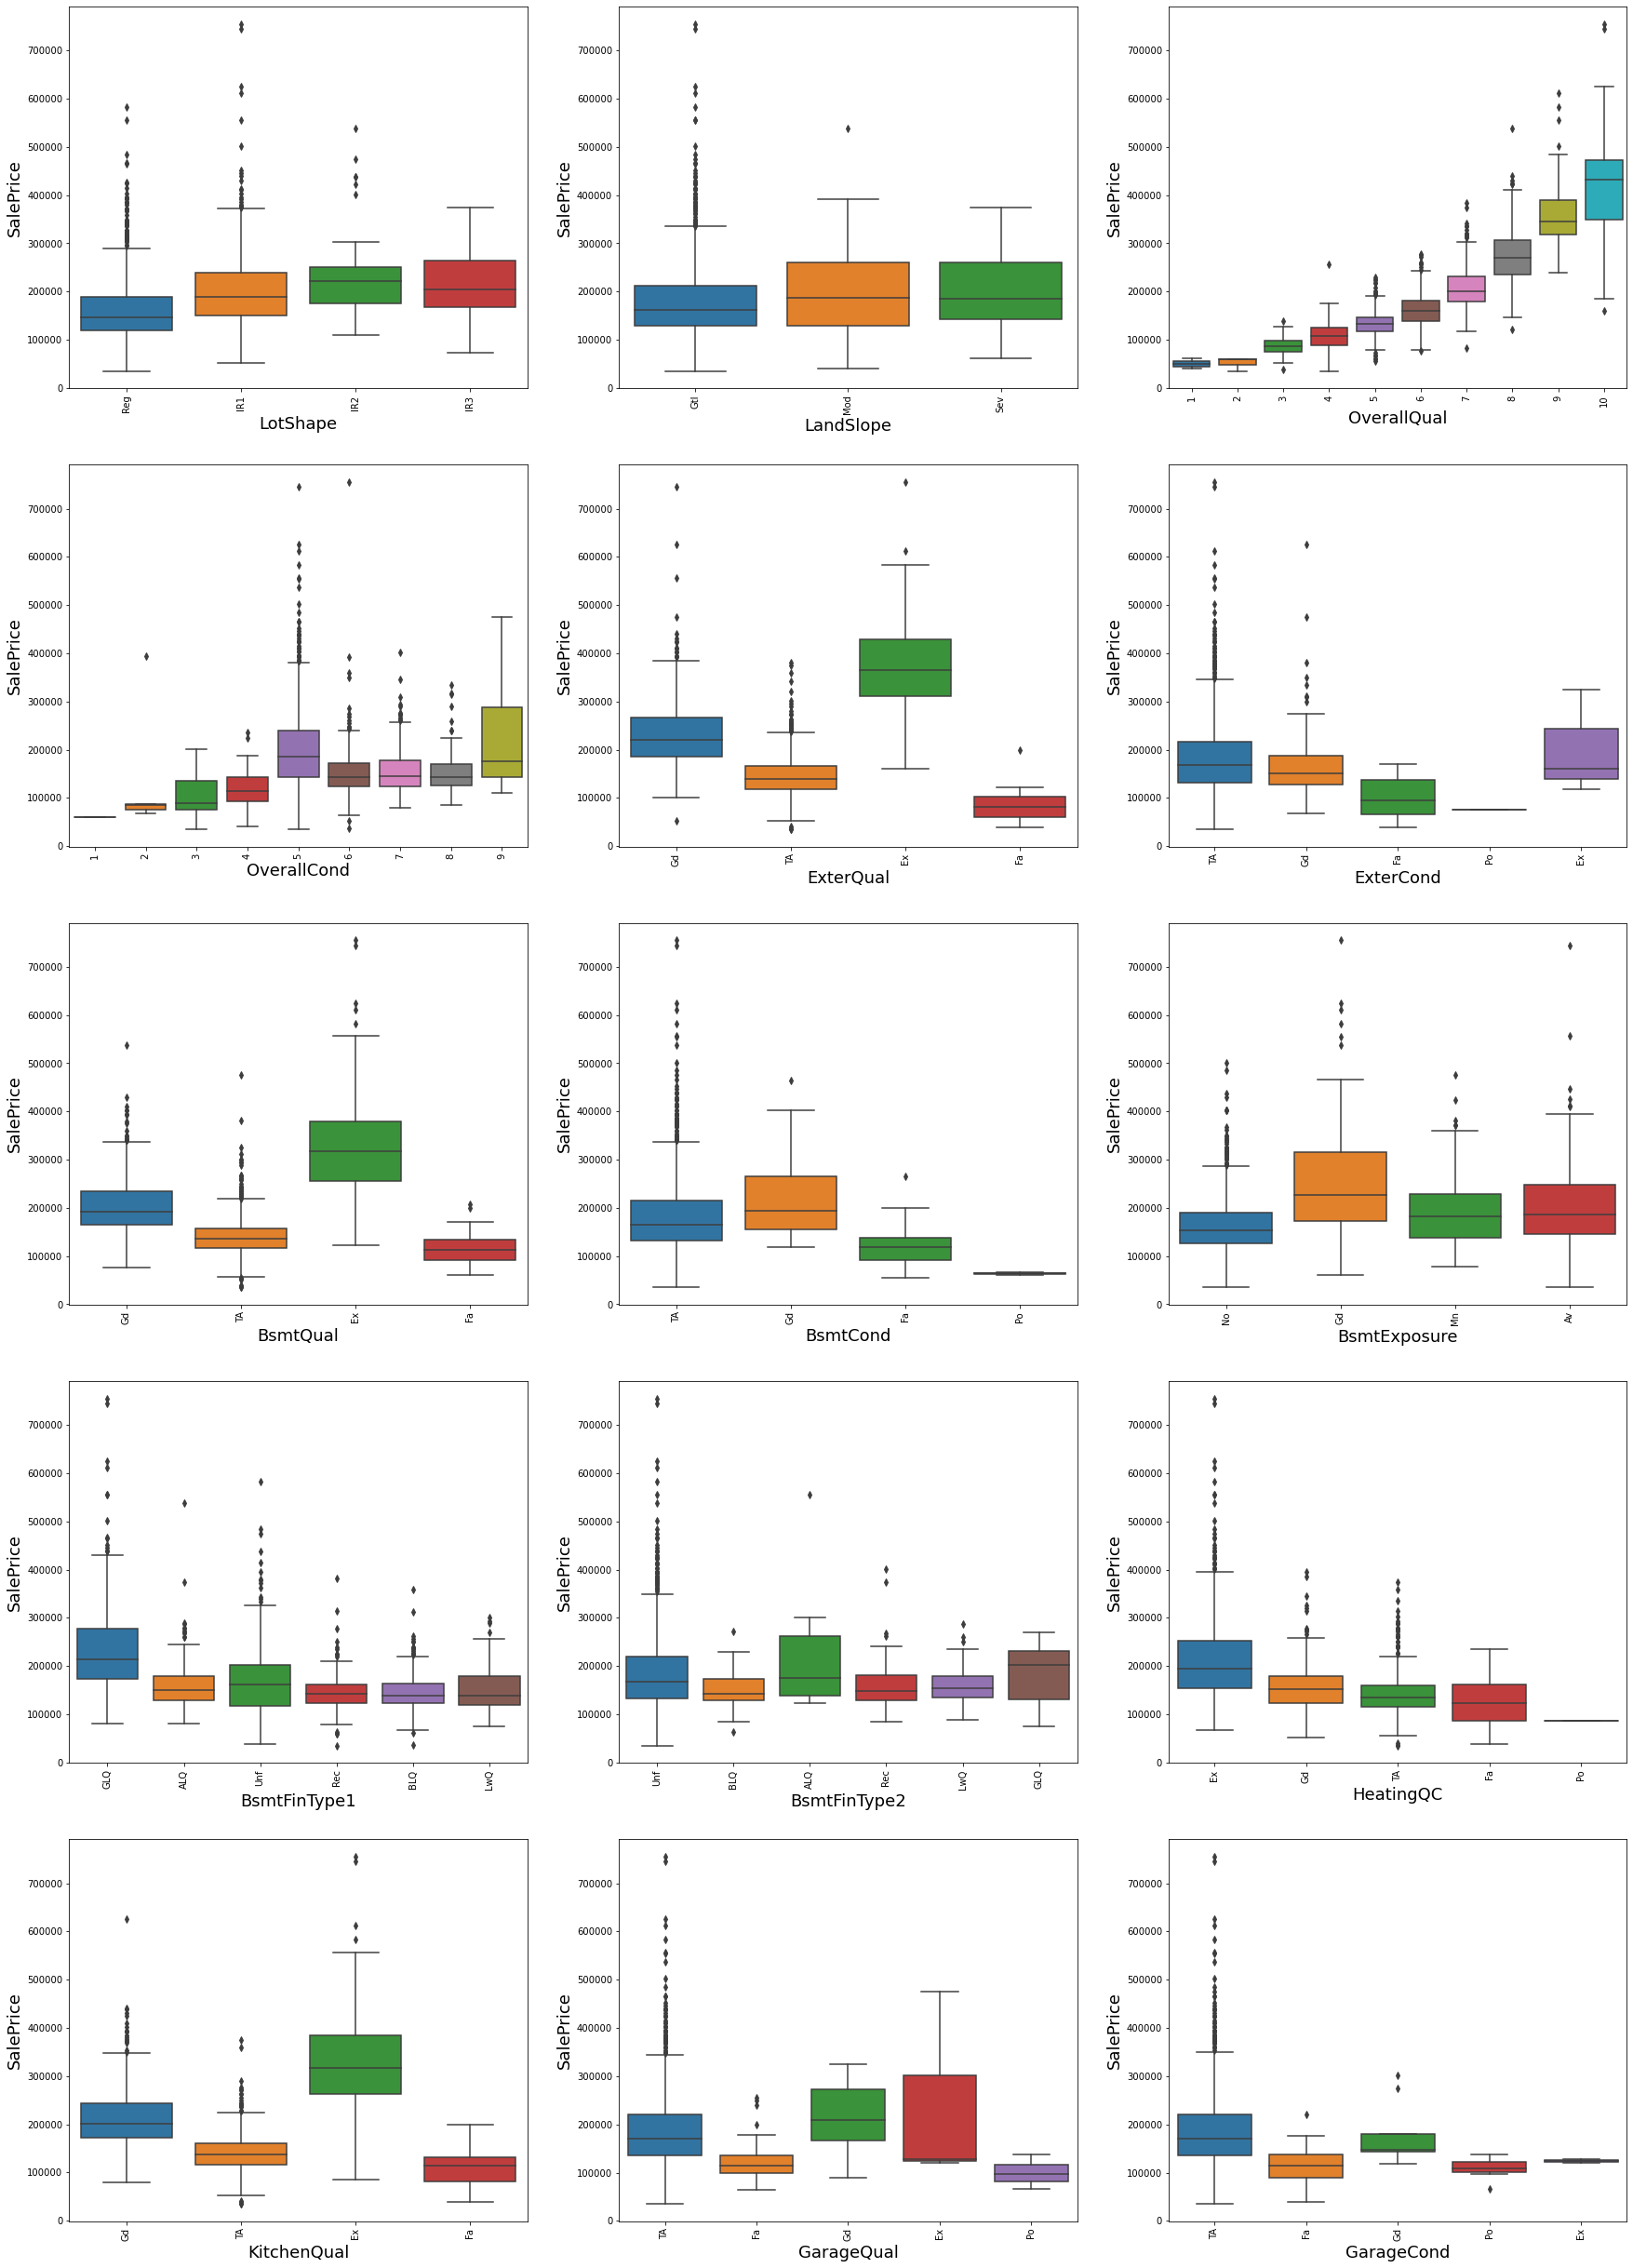

In [27]:
# Ordered Catagorical Variable Boxplot
plt.figure(figsize=(30, 80))

i = 1
# Taking Ordered Catagorical Variables
for col in Ordered_Categorical_Variables:
    drawBoxPlot(col, i)
    i = i + 1

In [28]:
# draw segmented box plot to see relation between variable
def draw_segmented_boxplot1(X, Hue, graph_number):
    plt.subplot(3,2,graph_number)
    sns.boxplot(x = X, y = 'SalePrice', hue = Hue, data = data)

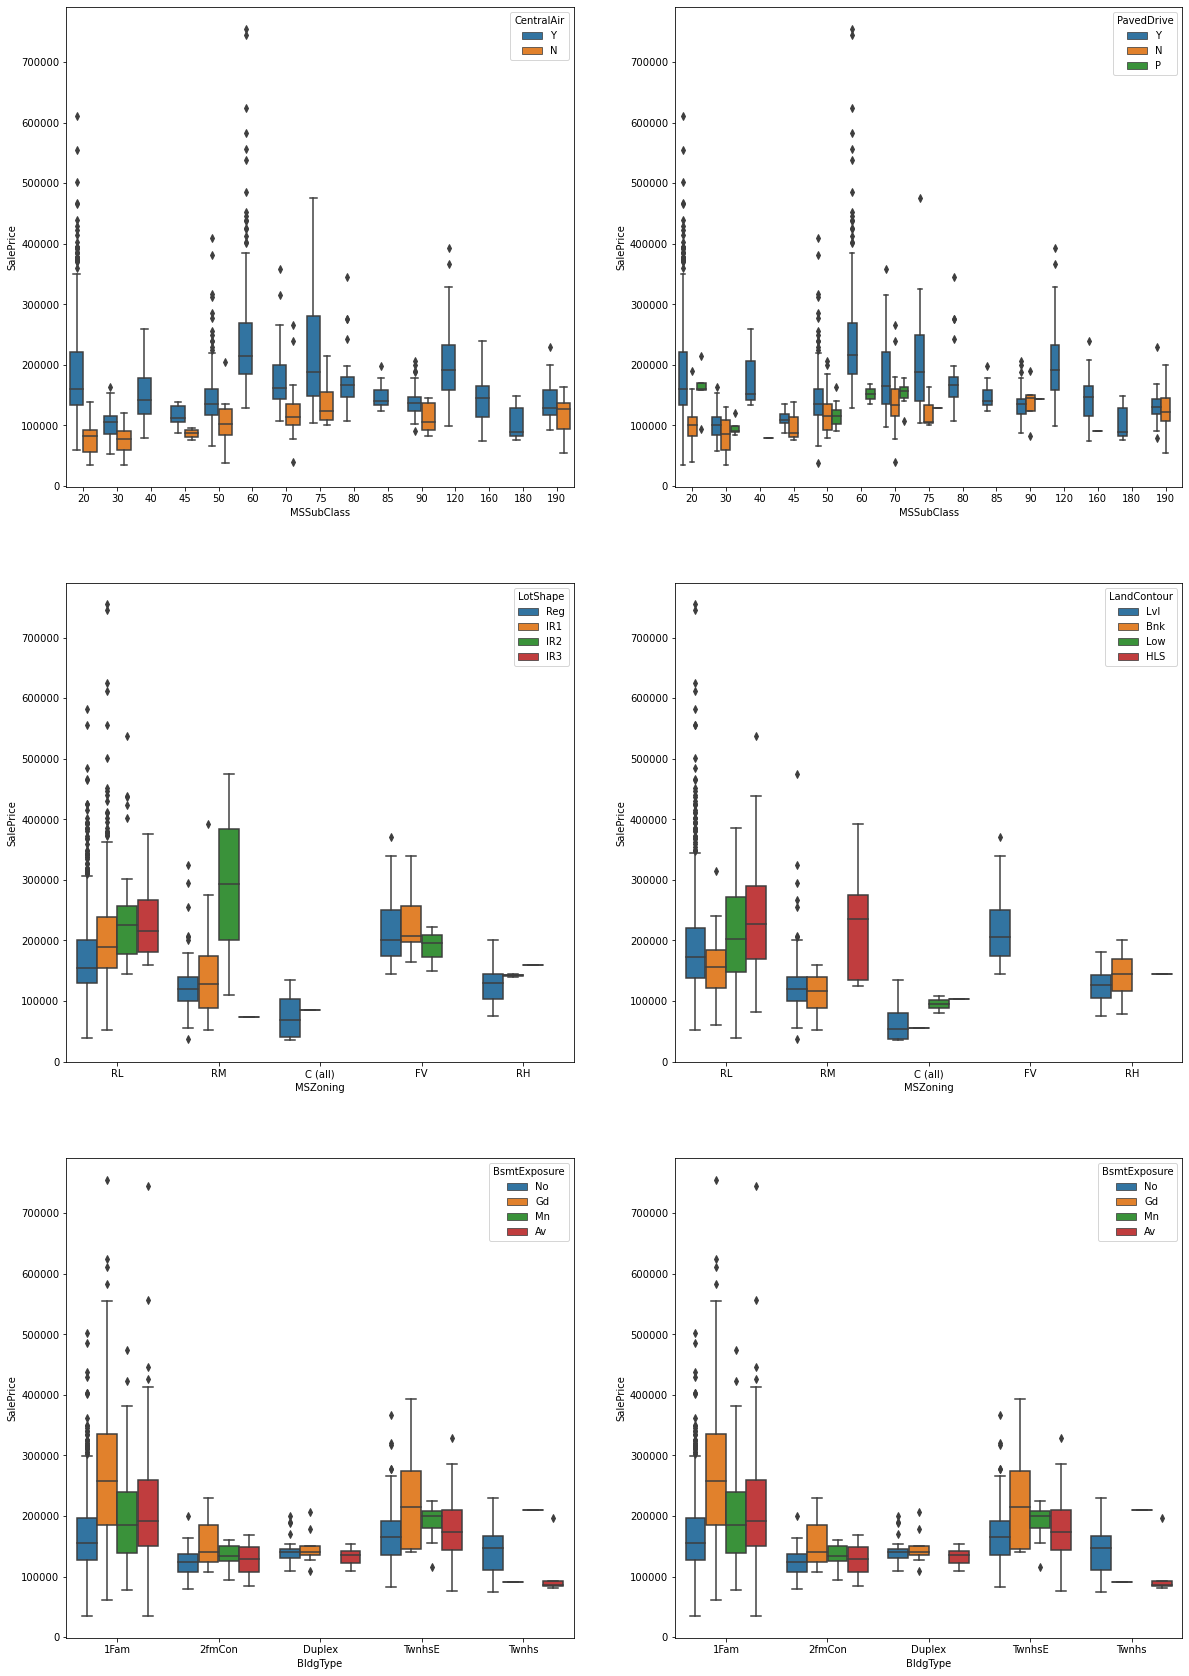

In [29]:
plt.figure(figsize=(20, 30))

draw_segmented_boxplot1('MSSubClass', 'CentralAir', 1)
draw_segmented_boxplot1('MSSubClass', 'PavedDrive', 2)
draw_segmented_boxplot1('MSZoning', 'LotShape', 3)
draw_segmented_boxplot1('MSZoning', 'LandContour', 4)
draw_segmented_boxplot1('BldgType', 'BsmtExposure', 5)
draw_segmented_boxplot1('BldgType', 'BsmtExposure', 6)


### Effect on different variable on building type (`BldgType`)

In [30]:
# draw segmented box plot to see relation between variable
def draw_segmented_boxplot2(X, Hue, graph_number):
    plt.subplot(8,2,graph_number)
    sns.boxplot(x = X, y = 'SalePrice', hue = Hue, data = data)


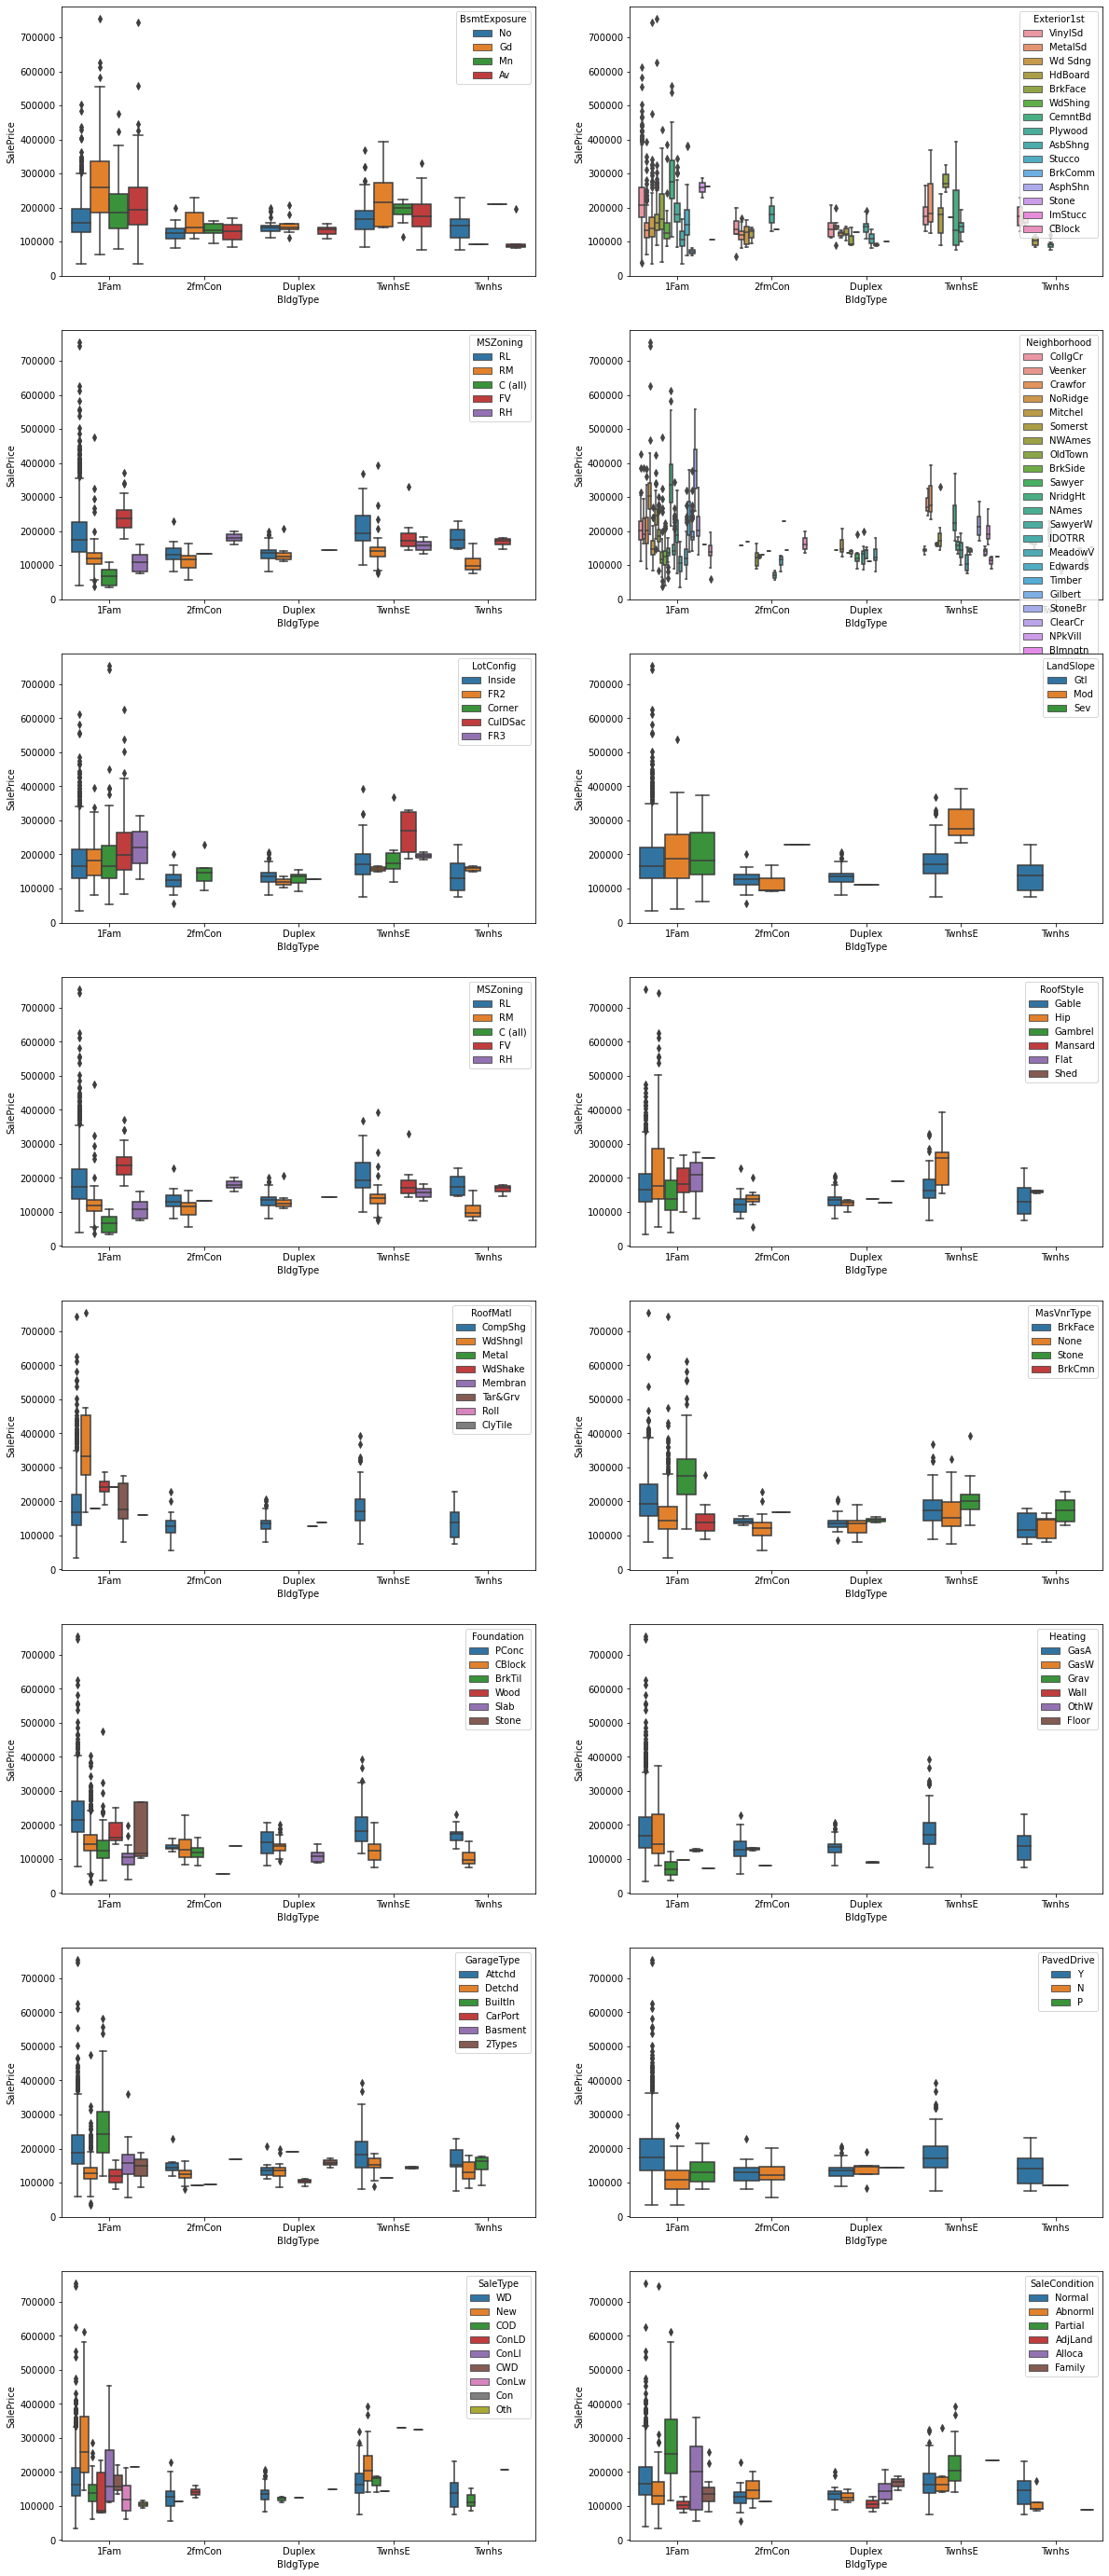

In [31]:
plt.figure(figsize=(20, 50))
segmented_variable = ['BsmtExposure', 'Exterior1st', 'MSZoning', 'Neighborhood', 'LotConfig', 
                      'LandSlope', 'MSZoning', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation',
                      'Heating', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']

i = 1
for col in segmented_variable:
    draw_segmented_boxplot2('BldgType', col, i)
    i = i + 1


In [32]:
def draw_pair_plot(X):
    sns.pairplot(data, x_vars=X, y_vars=['SalePrice'], kind='scatter')

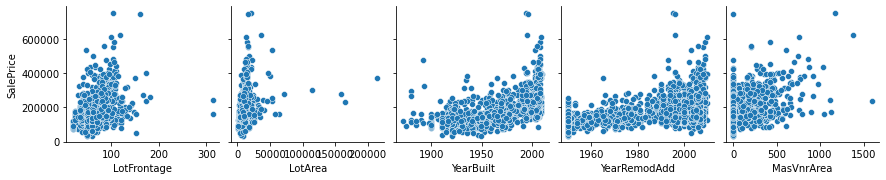

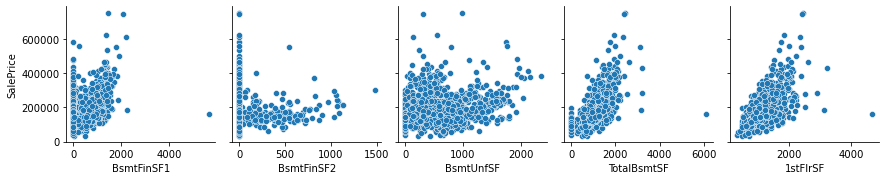

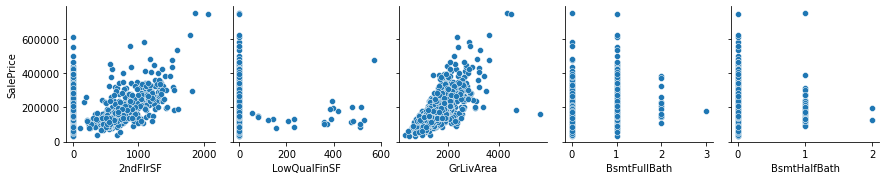

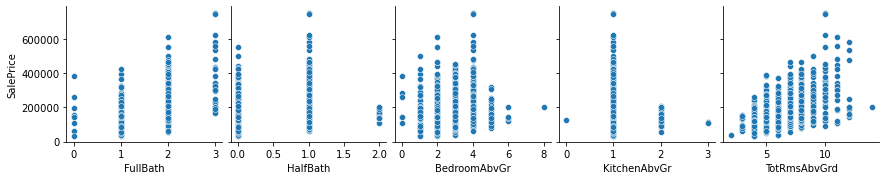

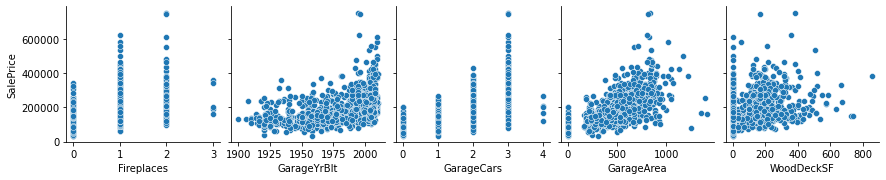

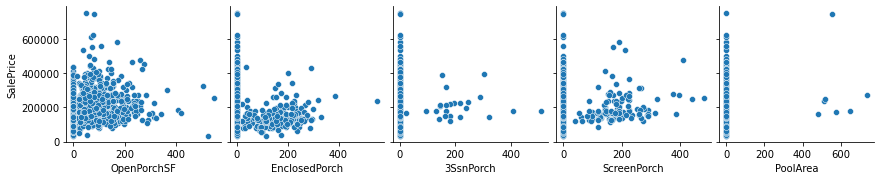

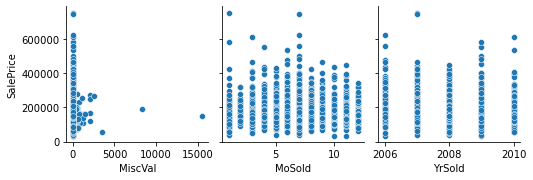

In [33]:
draw_pair_plot(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea'])
draw_pair_plot(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'])
draw_pair_plot(['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'])
draw_pair_plot(['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'])
draw_pair_plot(['Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'])
draw_pair_plot(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'])
draw_pair_plot(['MiscVal', 'MoSold', 'YrSold'])


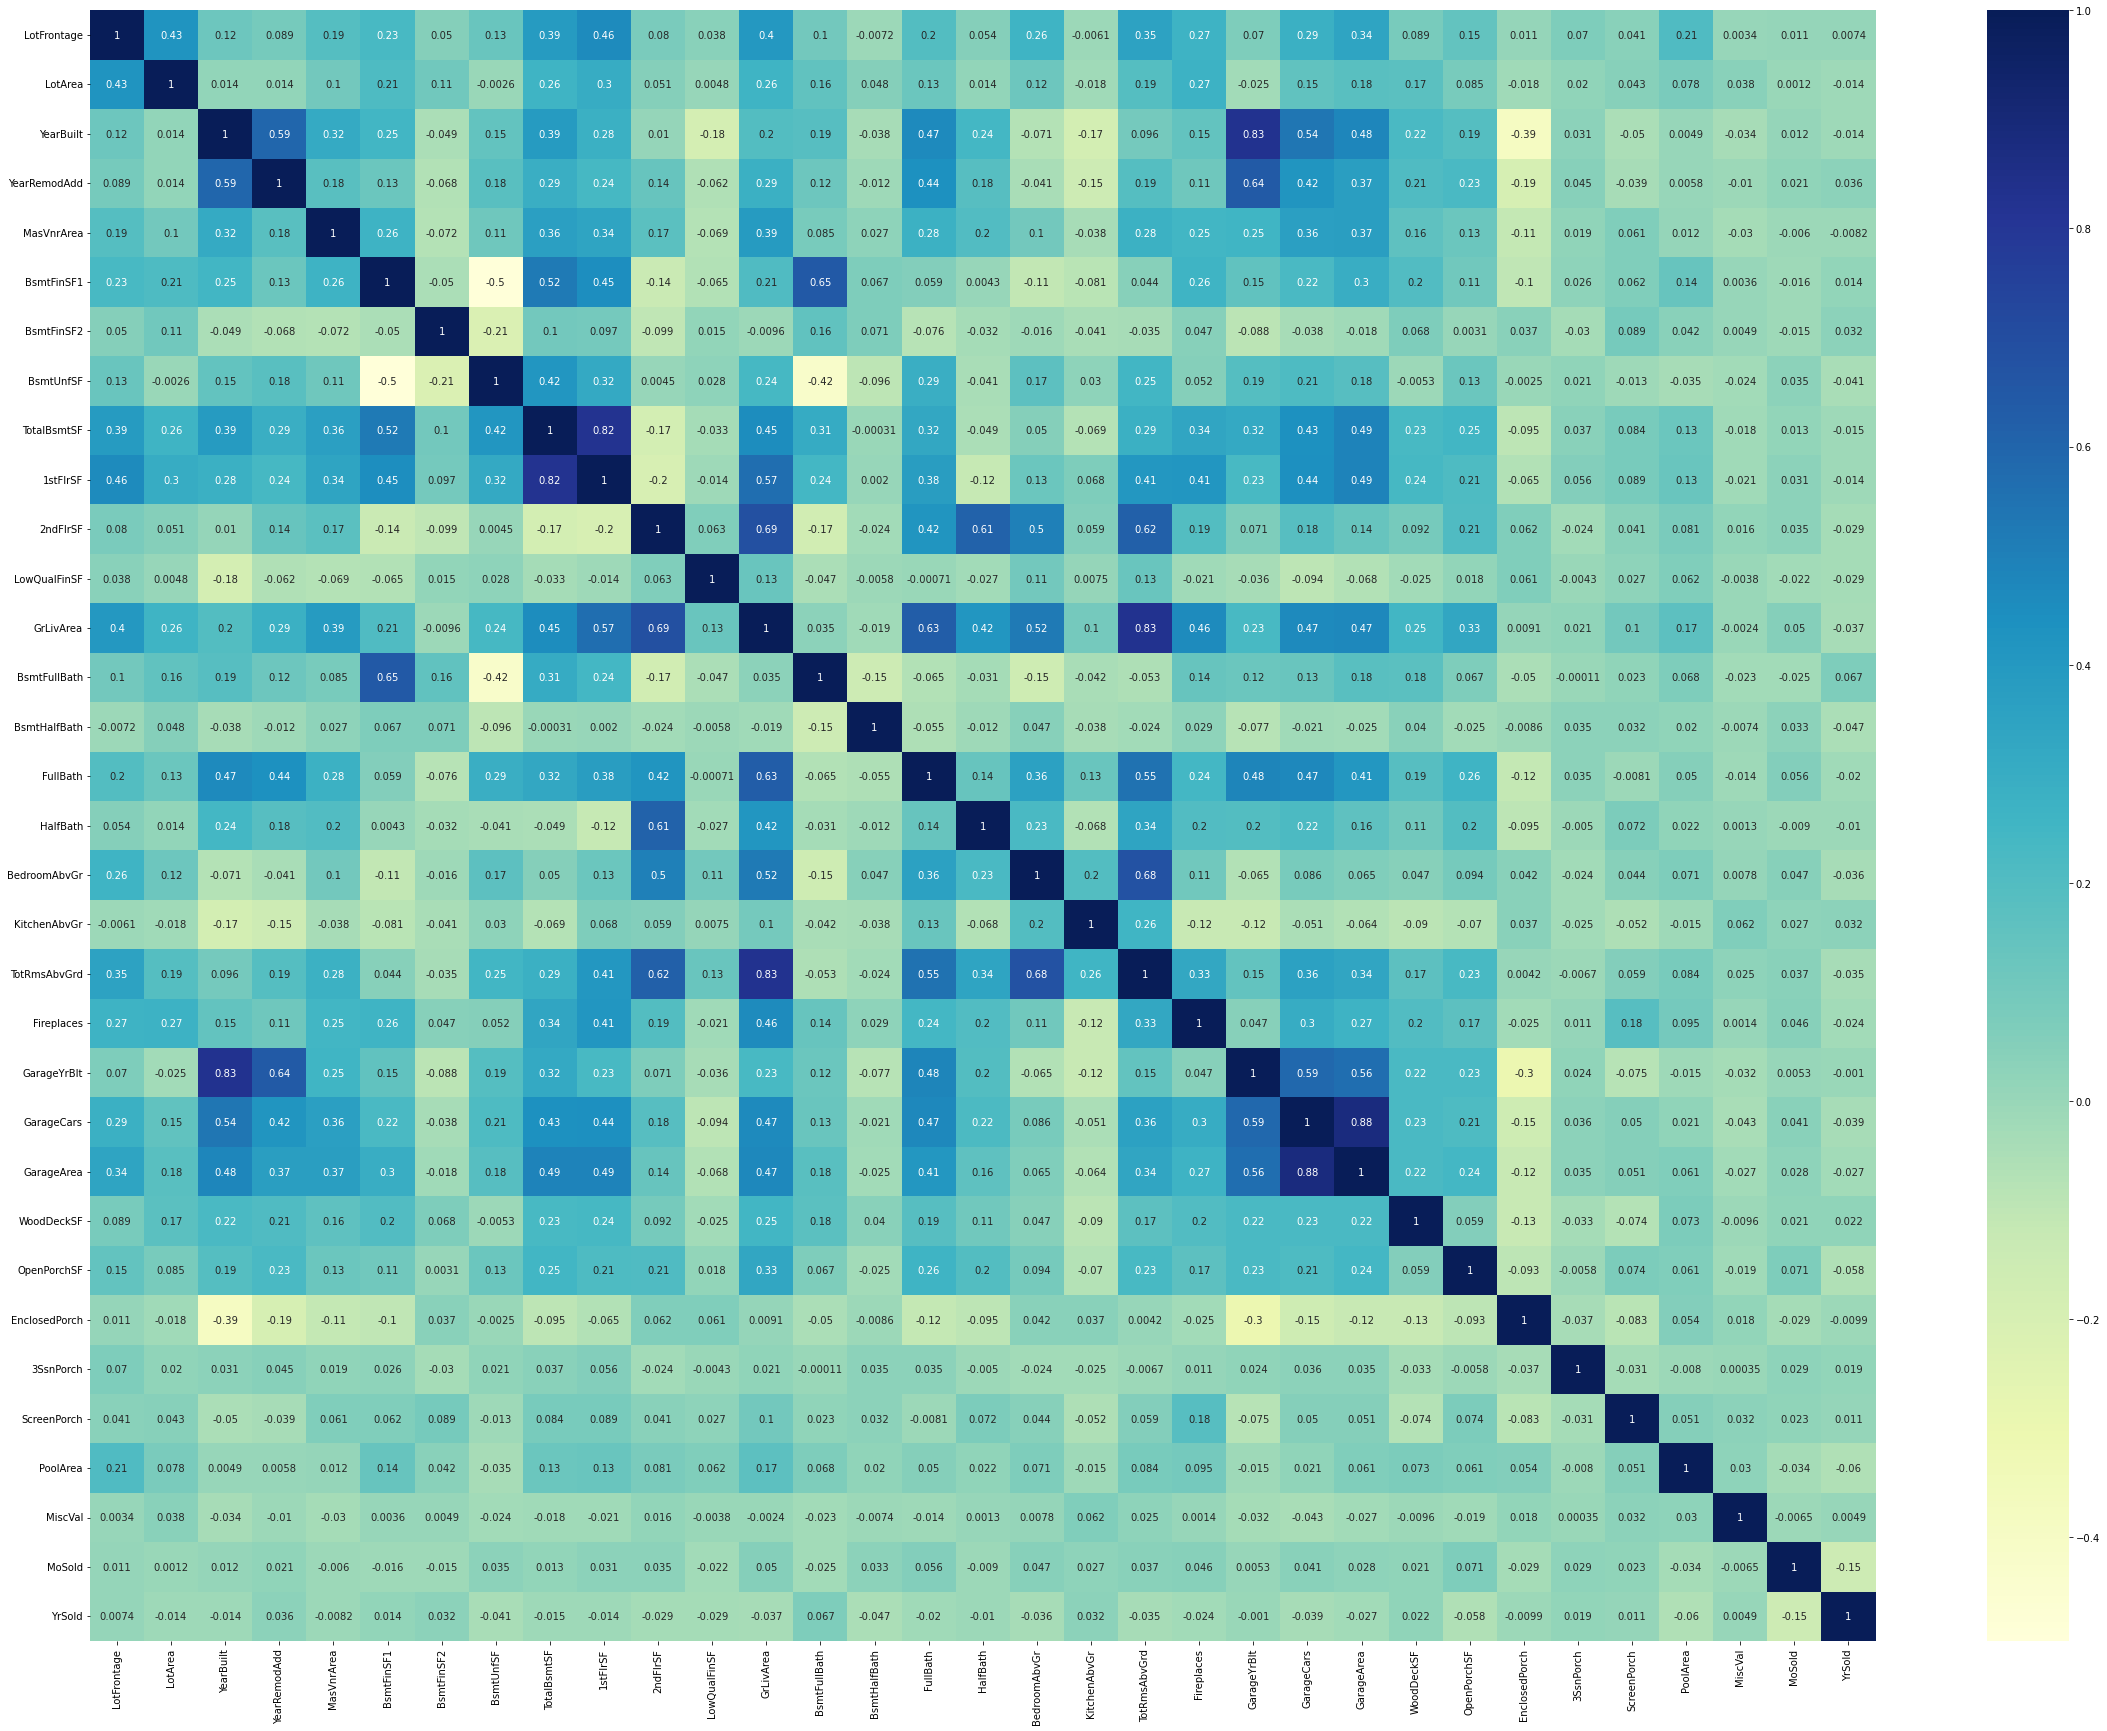

In [34]:
# Drawing heatmap to understand 
plt.figure(figsize = (40, 30))
sns.heatmap(data[Continuous_Variables].corr(), annot = True, cmap="YlGnBu")
plt.show()

## 4 Missing Value Impute

In [35]:
# List down all null valued columns
data.loc[:,data.isnull().sum() > 0].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [36]:
data['LotFrontage'].mean()

70.04995836802665

In [37]:
# Taking 'mean value to impute the 'LotFrontage' value
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['LotFrontage'].value_counts()

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
137.000000      1
38.000000       1
33.000000       1
150.000000      1
46.000000       1
Name: LotFrontage, Length: 111, dtype: int64

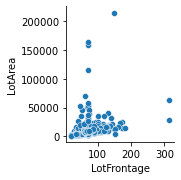

In [38]:
# LotFrontage : Can be imputed with this relationship also (options 2)
sns.pairplot(data, x_vars='LotFrontage', y_vars=['LotArea'], kind='scatter')

In [39]:
# Taking 'MasVnrType' mode value to impute the value
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [40]:
# Taking 'MasVnrArea' null value as 0 as mostly all 'MasVnrType = None' have value zero
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['MasVnrArea'].value_counts()

0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [41]:
data['BsmtQual'] =  data['BsmtQual'].fillna('NoBasement')
data['BsmtQual'].value_counts()

TA            649
Gd            618
Ex            121
NoBasement     37
Fa             35
Name: BsmtQual, dtype: int64

In [42]:
data['BsmtCond'] =  data['BsmtCond'].fillna('NoBasement')
data['BsmtCond'].value_counts()

TA            1311
Gd              65
Fa              45
NoBasement      37
Po               2
Name: BsmtCond, dtype: int64

In [43]:
data['BsmtExposure'] =  data['BsmtExposure'].fillna('NoBasement')
data['BsmtExposure'].value_counts()

No            953
Av            221
Gd            134
Mn            114
NoBasement     38
Name: BsmtExposure, dtype: int64

In [44]:
data['BsmtFinType1'] =  data['BsmtFinType1'].fillna('NoBasement')
data['BsmtFinType1'].value_counts()

Unf           430
GLQ           418
ALQ           220
BLQ           148
Rec           133
LwQ            74
NoBasement     37
Name: BsmtFinType1, dtype: int64

In [45]:
data['BsmtFinType2'] =  data['BsmtFinType2'].fillna('NoBasement')
data['BsmtFinType2'].value_counts()

Unf           1256
Rec             54
LwQ             46
NoBasement      38
BLQ             33
ALQ             19
GLQ             14
Name: BsmtFinType2, dtype: int64

In [46]:
data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [47]:
# Impute mode value of 'Electrical' variable
data['Electrical'] =  data['Electrical'].fillna('SBrkr')
data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [48]:
# Impute mode value of 'GarageType' variable
data['GarageType'] =  data['GarageType'].fillna('NoGarage')
data['GarageType'].value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [49]:
# Impute NoGarage Entry for Null values in 'GarageYrBlt' variable
data['GarageYrBlt'] =  data['GarageYrBlt'].fillna(0)
data['GarageYrBlt'].value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [50]:
# Impute mode value of 'GarageQual' variable
data['GarageQual'] =  data['GarageQual'].fillna('TA')
data['GarageQual'].value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [51]:
# Impute mode value of 'GarageCond' variable
data['GarageCond'] =  data['GarageCond'].fillna('TA')
data['GarageCond'].value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [52]:
# Impute mode value of 'GarageFinish' variable
data['GarageFinish'] =  data['GarageFinish'].fillna('NoGarage')
data['GarageFinish'].value_counts()

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

In [53]:
# List down all null valued columns
data.loc[:,data.isnull().sum() > 0].isnull().sum()

Series([], dtype: float64)

### Add dummies for Catagorical Variables

In [54]:
def Convert_Dummies(ColumnName):
    # Print some Info
    print(f"Conveting {ColumnName} column")
    print(f"Null Count : {data[ColumnName].isnull().sum()}")
#     print(data[ColumnName].value_counts())
    
    # Do dummies operation
#     data[ColumnName] = ColumnName + '_' + data[ColumnName].astype(str)
    dummies = pd.get_dummies(data[ColumnName], drop_first = True, prefix= ColumnName)
    
    # Print output dummies
#     print(dummies.head())
    return dummies

In [55]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [56]:
# STEP FOLLOWED:

# Take for loop for each Catagorical Variables
    # Convert to dumies and receive as return value
    # Concatenate in main dataframe
    # drop the original column after concatenation

for col in data[Categorical_Variables].columns:
    dummies = Convert_Dummies(col)
    data = pd.concat([data, dummies], axis=1)
    data.drop([col], axis=1, inplace=True)

Conveting MSSubClass column
Null Count : 0
Conveting MSZoning column
Null Count : 0
Conveting Street column
Null Count : 0
Conveting LandContour column
Null Count : 0
Conveting Utilities column
Null Count : 0
Conveting LotConfig column
Null Count : 0
Conveting Neighborhood column
Null Count : 0
Conveting Condition1 column
Null Count : 0
Conveting Condition2 column
Null Count : 0
Conveting BldgType column
Null Count : 0
Conveting HouseStyle column
Null Count : 0
Conveting RoofStyle column
Null Count : 0
Conveting RoofMatl column
Null Count : 0
Conveting Exterior1st column
Null Count : 0
Conveting Exterior2nd column
Null Count : 0
Conveting MasVnrType column
Null Count : 0
Conveting Foundation column
Null Count : 0
Conveting Heating column
Null Count : 0
Conveting CentralAir column
Null Count : 0
Conveting Electrical column
Null Count : 0
Conveting Functional column
Null Count : 0
Conveting GarageType column
Null Count : 0
Conveting GarageFinish column
Null Count : 0
Conveting PavedDrive

In [57]:
data.head()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,Reg,Gtl,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,Reg,Gtl,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,IR1,Gtl,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,IR1,Gtl,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,IR1,Gtl,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


In [58]:
data.shape

(1460, 216)

In [59]:
def Ordinal_Encoding_Custom(column_name, list):
    X = {}
    i = 1
    for col in list:
        X[col] = i
        i = i+1
    return X

In [60]:
def Ordinal_Encoding_auto(column_name):
    X = {}
    i = 1
    for col in data[column_name].value_counts().index:
        X[col] = i
        i = i+1
    return X

In [61]:
Ordered_Categorical_Variables

['LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageQual',
 'GarageCond']

In [62]:
X = Ordinal_Encoding_auto('LotShape')
data['LotShape'] = data['LotShape'].replace(X)
X = Ordinal_Encoding_auto('LandSlope')
data['LandSlope'] = data['LandSlope'].replace(X)
X = Ordinal_Encoding_Custom('OverallQual', [1,2,3,4,5,6,7,9,10])
data['OverallQual'] = data['OverallQual'].replace(X)
X = Ordinal_Encoding_Custom('OverallCond', [1,2,3,4,5,6,7,9,10])
data['OverallCond'] = data['OverallCond'].replace(X)
X = Ordinal_Encoding_Custom('ExterQual', ['Po', 'Fa','TA','Gd','Ex'])
data['ExterQual'] = data['ExterQual'].replace(X)
X = Ordinal_Encoding_Custom('ExterCond', ['Po', 'Fa','TA','Gd','Ex'])
data['ExterCond'] = data['ExterCond'].replace(X)
X = Ordinal_Encoding_Custom('BsmtQual', ['NoBasement', 'Po', 'Fa','TA','Gd','Ex'])
data['BsmtQual'] = data['BsmtQual'].replace(X)
X = Ordinal_Encoding_Custom('BsmtCond', ['NoBasement', 'Po', 'Fa','TA','Gd','Ex'])
data['BsmtCond'] = data['BsmtCond'].replace(X)
X = Ordinal_Encoding_Custom('BsmtExposure', ['NoBasement', 'No','Mn','Av','Gd'])
data['BsmtExposure'] = data['BsmtExposure'].replace(X)
X = Ordinal_Encoding_Custom('BsmtFinType1', ['NoBasement', 'Unf','LwQ','Rec','BLQ','ALQ','GLQ'])
data['BsmtFinType1'] = data['BsmtFinType1'].replace(X)
X = Ordinal_Encoding_Custom('BsmtFinType2', ['NoBasement', 'Unf','LwQ','Rec','BLQ','ALQ','GLQ'])
data['BsmtFinType2'] = data['BsmtFinType2'].replace(X)
X = Ordinal_Encoding_Custom('HeatingQC', ['Po', 'Fa','TA','Gd','Ex'])
data['HeatingQC'] = data['HeatingQC'].replace(X)
X = Ordinal_Encoding_Custom('KitchenQual', ['Po', 'Fa','TA','Gd','Ex'])
data['KitchenQual'] = data['KitchenQual'].replace(X)
X = Ordinal_Encoding_Custom('GarageQual', ['NoGarage', 'Po', 'Fa','TA','Gd','Ex'])
data['GarageQual'] = data['GarageQual'].replace(X)
X = Ordinal_Encoding_Custom('GarageCond', ['NoGarage', 'Po', 'Fa','TA','Gd','Ex'])
data['GarageCond'] = data['GarageCond'].replace(X)

In [63]:
data.head()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,1,1,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,1,1,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,2,1,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,2,1,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,2,1,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
# list(data.columns)

## Scalling the variables

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
num_vars = Ordered_Categorical_Variables
num_vars

['LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageQual',
 'GarageCond']

In [68]:
data_scaled = data
data_scaled[num_vars] = scaler.fit_transform(data_scaled[num_vars])

In [69]:
data_scaled.describe()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,0.136073,0.031164,0.632192,0.651468,1971.267808,1984.865753,103.117123,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,22.024023,9981.264932,0.194099,0.138116,0.162284,0.153190,30.202904,20.645407,180.731373,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,0.500000,0.571429,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,70.049958,9478.500000,0.000000,0.000000,0.625000,0.571429,1973.000000,1994.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,79.000000,11601.500000,0.333333,0.000000,0.750000,0.714286,2000.000000,2004.000000,164.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,313.000000,215245.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,2010.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the Data into Training and Testing Sets

In [70]:
# split into X and y
X = data # predictors in variable X
X = X.drop(columns=['SalePrice'], axis=1)

In [71]:
y = data['SalePrice'] # response variable in Y
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [72]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [73]:
X_train

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,211,67.0,5604,0.000000,0.0,0.500,0.714286,1925,1950,0.0,...,0,0,0,0,1,0,0,0,1,0
318,319,90.0,9900,0.000000,0.5,0.750,0.571429,1993,1993,256.0,...,0,0,0,0,1,0,0,0,1,0
239,240,52.0,8741,0.000000,0.0,0.625,0.428571,1945,1950,0.0,...,0,0,0,0,1,0,0,0,1,0
986,987,59.0,5310,0.000000,0.0,0.625,1.000000,1910,2003,0.0,...,0,0,0,0,1,0,0,0,1,0
1416,1417,60.0,11340,0.000000,0.0,0.375,0.714286,1885,1950,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1010,60.0,6000,0.000000,0.0,0.500,0.571429,1926,1950,0.0,...,0,0,0,0,1,0,0,0,1,0
802,803,63.0,8199,0.000000,0.0,0.750,0.571429,2005,2005,0.0,...,0,0,0,0,1,0,0,0,1,0
53,54,68.0,50271,0.333333,0.0,0.875,0.571429,1981,1987,0.0,...,0,0,0,0,1,0,0,0,1,0
350,351,68.0,7820,0.333333,0.0,0.875,0.571429,2007,2007,362.0,...,0,0,1,0,0,0,0,0,0,1


In [74]:
X_test

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,1437,60.000000,9000,0.000000,0.0,0.375,0.714286,1971,1971,0.0,...,0,0,0,0,1,0,0,0,1,0
57,58,89.000000,11645,0.333333,0.0,0.750,0.571429,2004,2004,0.0,...,0,0,0,0,1,0,0,0,1,0
780,781,63.000000,7875,0.000000,0.0,0.750,0.571429,1995,1996,38.0,...,0,0,0,0,1,0,0,0,1,0
382,383,79.000000,9245,0.333333,0.0,0.750,0.571429,2006,2006,0.0,...,0,0,0,0,1,0,0,0,1,0
1170,1171,76.000000,9880,0.000000,0.0,0.625,0.714286,1977,1977,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,80.000000,9600,0.000000,0.0,0.500,0.714286,1959,1959,132.0,...,0,0,0,0,1,0,0,0,1,0
555,556,58.000000,6380,0.000000,0.0,0.500,0.714286,1922,1950,0.0,...,0,0,0,0,1,0,0,0,1,0
399,400,65.000000,8125,0.000000,0.0,0.750,0.571429,2006,2007,100.0,...,0,0,0,0,1,0,0,0,1,0
545,546,70.049958,13837,0.333333,0.0,0.750,0.571429,1988,1988,178.0,...,0,0,0,0,1,0,0,0,1,0


# Building a Linear Model

## RFE (Recursive Feature Elimination)

In [75]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=100,step=1)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False False  True  True  True False False False  True False
  True  True  True  True False False False False False False False False
 False False  True False False False False  True  True  True  True False
  True False  True False False False False False False False False False
 False  True False False  True False False  True False False  True  True
 False False  True False  True  True False  True  True False  True False
  True  True  True False False False  True False  True  True False False
 False False False False  True False  True  True  True  True  True  True
  True  True False  True False  True  True False False False False  True
 False False  True  True False False False  True  True  True False False
  True  True  True False  True False  True  True  True False False  True
  True  True  True  True  True  True  True False False  True False  True
  True False  True False False False False False  True False  True  True
  True  True  True False False  True  True False Fa

In [76]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,LandSlope,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFullBath,...,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_New,SaleCondition_Family,SaleCondition_Partial
210,1.0,0.0,0.500,0.714286,0.333333,0.6,0.75,0.25,0.500000,1,...,1,0,0,0,0,0,0,0,0,0
318,1.0,0.5,0.750,0.571429,0.666667,0.8,0.75,1.00,1.000000,1,...,0,1,0,0,0,0,0,0,0,0
239,1.0,0.0,0.625,0.428571,0.333333,0.6,0.50,0.25,0.333333,0,...,0,0,1,0,0,0,0,0,0,0
986,1.0,0.0,0.625,1.000000,0.333333,0.6,0.50,0.25,0.166667,0,...,0,0,1,0,0,0,0,0,0,0
1416,1.0,0.0,0.375,0.714286,0.333333,0.6,0.75,0.25,0.166667,0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     65.54
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:41:10   Log-Likelihood:                -11925.
No. Observations:                1021   AIC:                         2.404e+04
Df Residuals:                     926   BIC:                         2.451e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.571e+

### RFE Again

In [78]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 50 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=50,step=1)

# Fit with 50 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[False False False False  True  True  True False False False  True False
  True  True  True  True False False False False False False False False
 False False False False False False False False  True False  True False
  True False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False  True False False False False False False  True False False
 False False False False False False  True  True False False False False
 False  True False False False False False False False False False False
 False False  True  True False False False False  True  True False False
 False  True  True False  True False False False False False False  True
  True  True  True  True  True  True  True False False  True False  True
  True False  True False False False False False False False  True  True
 False  True  True False False  True False False Fa

In [79]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 50 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,LandSlope,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,...,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Wd Shng,Foundation_Slab,Foundation_Wood,Heating_OthW,GarageType_NoGarage,SaleType_Con,SaleType_ConLI,SaleType_New
210,1.0,0.0,0.500,0.714286,0.333333,0.6,0.75,0.25,0.500000,0.333333,...,0,0,0,0,0,0,1,0,0,0
318,1.0,0.5,0.750,0.571429,0.666667,0.8,0.75,1.00,1.000000,0.666667,...,0,0,0,0,0,0,0,0,0,0
239,1.0,0.0,0.625,0.428571,0.333333,0.6,0.50,0.25,0.333333,0.333333,...,0,0,0,0,0,0,0,0,0,0
986,1.0,0.0,0.625,1.000000,0.333333,0.6,0.50,0.25,0.166667,0.666667,...,0,0,0,0,0,0,0,0,0,0
1416,1.0,0.0,0.375,0.714286,0.333333,0.6,0.75,0.25,0.166667,0.333333,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Fitting the model with 50 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     92.07
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:41:12   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     971   BIC:                         2.451e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.667e+05 

### RFE Again

In [81]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 30 features
lm3 = LinearRegression()
rfe3 = RFE(lm3, n_features_to_select=30,step=1)

# Fit with 30 features
rfe3.fit(X_train, y_train)

# Print the boolean results
print(rfe3.support_)           
print(rfe3.ranking_)  

[False False False False False  True False False False False  True False
  True  True  True False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False  True  True False False False False
 False  True False False False False False False False False False False
 False False  True  True False False False False False  True False False
 False False  True False  True False False False False False False  True
  True  True  True  True  True  True False False False False False False
  True False False False False False False False False False False False
 False False  True False False False False False Fa

In [82]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe3.support_]

# Subsetting training data for 30 selected columns
X_train_rfe3 = X_train[col1]

# Add a constant to the model
X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

,const,OverallQual,ExterQual,BsmtQual,BsmtCond,BsmtExposure,KitchenQual,MSSubClass_75,MSSubClass_120,Neighborhood_Crawfor,...,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_ImStucc,Exterior2nd_ImStucc,Foundation_Slab,Foundation_Wood,Heating_OthW,SaleType_Con
210,1.0,0.500,0.333333,0.6,0.75,0.25,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,1.0,0.750,0.666667,0.8,0.75,1.00,0.666667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,1.0,0.625,0.333333,0.6,0.50,0.25,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,1.0,0.625,0.333333,0.6,0.50,0.25,0.666667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1416,1.0,0.375,0.333333,0.6,0.75,0.25,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Fitting the model with 30 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          8.19e-293
Time:                        23:41:15   Log-Likelihood:                -12210.
No. Observations:                1021   AIC:                         2.448e+04
Df Residuals:                     990   BIC:                         2.463e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.092e+05 

### rfe model 1 : r2 =  0.869, Adjusted r2 =  0.856
### rfe model 2 : r2 =  0.823, Adjusted r2 =  0.814
### rfe model 3 : r2 = 0.772, Adjusted r2 = 0.765

## Considering `model: 2` which have less features and adjusted r2 comes closer to r2 value

In [84]:
X_train_rfe2.columns

Index(['const', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual',
       'Fireplaces', 'GarageCars', 'MSSubClass_75', 'MSSubClass_120',
       'LotConfig_FR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition2_PosA',
       'Condition2_PosN', 'BldgType_Duplex', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_CBlock',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Plywood',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Shng',
       'Foundation_Slab', 'Foundation_Wood', 'Heating_OthW',
       'Gara

In [85]:
X_train_rfe2 = X_train_rfe2.drop('const',axis=1)

In [86]:
X_train = X_train_rfe2

In [87]:
X_train_rfe2

,LandSlope,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,Fireplaces,...,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Wd Shng,Foundation_Slab,Foundation_Wood,Heating_OthW,GarageType_NoGarage,SaleType_Con,SaleType_ConLI,SaleType_New
210,0.0,0.500,0.714286,0.333333,0.6,0.75,0.25,0.500000,0.333333,0,...,0,0,0,0,0,0,1,0,0,0
318,0.5,0.750,0.571429,0.666667,0.8,0.75,1.00,1.000000,0.666667,1,...,0,0,0,0,0,0,0,0,0,0
239,0.0,0.625,0.428571,0.333333,0.6,0.50,0.25,0.333333,0.333333,1,...,0,0,0,0,0,0,0,0,0,0
986,0.0,0.625,1.000000,0.333333,0.6,0.50,0.25,0.166667,0.666667,0,...,0,0,0,0,0,0,0,0,0,0
1416,0.0,0.375,0.714286,0.333333,0.6,0.75,0.25,0.166667,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.0,0.500,0.571429,0.333333,0.6,0.75,0.25,0.166667,0.333333,0,...,0,0,0,0,0,0,1,0,0,0
802,0.0,0.750,0.571429,0.666667,0.8,0.75,0.75,1.000000,0.666667,1,...,0,0,1,0,0,0,0,0,0,0
53,0.0,0.875,0.571429,0.666667,1.0,0.75,1.00,1.000000,0.666667,1,...,0,0,1,0,0,0,0,0,0,0
350,0.0,0.875,0.571429,1.000000,1.0,0.75,0.25,0.166667,1.000000,1,...,0,0,0,0,0,0,0,0,0,1


### VIF

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# a = X_train_rfe2.drop('const',axis=1)
a = X_train_rfe2

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,Exterior1st_CBlock,inf
38,Exterior2nd_CBlock,inf
25,RoofMatl_CompShg,85.62
5,BsmtCond,77.63
4,BsmtQual,66.91
1,OverallQual,48.95
2,OverallCond,25.49
3,ExterQual,22.20
10,GarageCars,18.46
8,KitchenQual,16.10


In [91]:
list(X_train_rfe2.columns)

['LandSlope',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'KitchenQual',
 'Fireplaces',
 'GarageCars',
 'MSSubClass_75',
 'MSSubClass_120',
 'LotConfig_FR3',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition2_PosA',
 'Condition2_PosN',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_Plywood',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Plywood',
 'Exterior2nd_Wd Shng',
 'Foundation_Slab',
 'Foundation_Wood',
 'Heating_OthW',
 'GarageType_NoGarage',
 'SaleType_Con',
 'SaleType_ConLI',
 'SaleType_Ne

In [92]:
## Take same column as X_train columns
X_test = X_test[X_train_rfe2.columns]
X_test

,LandSlope,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,Fireplaces,...,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Wd Shng,Foundation_Slab,Foundation_Wood,Heating_OthW,GarageType_NoGarage,SaleType_Con,SaleType_ConLI,SaleType_New
1436,0.0,0.375,0.714286,0.333333,0.6,0.75,0.25,0.833333,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
57,0.0,0.750,0.571429,0.666667,0.8,0.75,0.25,0.166667,0.666667,0,...,0,0,0,0,0,0,0,0,0,0
780,0.0,0.750,0.571429,0.333333,0.8,1.00,0.25,0.166667,0.333333,1,...,0,0,0,0,0,0,0,0,0,0
382,0.0,0.750,0.571429,0.666667,0.8,0.75,0.75,0.166667,0.666667,0,...,0,0,0,0,0,0,0,0,0,0
1170,0.0,0.625,0.714286,0.333333,0.6,0.75,0.75,0.833333,0.333333,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.0,0.500,0.714286,0.333333,0.6,0.75,0.25,0.833333,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
555,0.0,0.500,0.714286,0.333333,0.6,0.50,0.25,0.166667,0.333333,1,...,0,0,0,0,0,0,0,0,0,0
399,0.0,0.750,0.571429,0.666667,0.8,0.75,0.25,1.000000,0.666667,0,...,0,0,0,0,0,0,0,0,0,0
545,0.0,0.750,0.571429,0.666667,0.8,1.00,0.25,1.000000,0.666667,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X_train_rfe2

,LandSlope,OverallQual,OverallCond,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,Fireplaces,...,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Wd Shng,Foundation_Slab,Foundation_Wood,Heating_OthW,GarageType_NoGarage,SaleType_Con,SaleType_ConLI,SaleType_New
210,0.0,0.500,0.714286,0.333333,0.6,0.75,0.25,0.500000,0.333333,0,...,0,0,0,0,0,0,1,0,0,0
318,0.5,0.750,0.571429,0.666667,0.8,0.75,1.00,1.000000,0.666667,1,...,0,0,0,0,0,0,0,0,0,0
239,0.0,0.625,0.428571,0.333333,0.6,0.50,0.25,0.333333,0.333333,1,...,0,0,0,0,0,0,0,0,0,0
986,0.0,0.625,1.000000,0.333333,0.6,0.50,0.25,0.166667,0.666667,0,...,0,0,0,0,0,0,0,0,0,0
1416,0.0,0.375,0.714286,0.333333,0.6,0.75,0.25,0.166667,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.0,0.500,0.571429,0.333333,0.6,0.75,0.25,0.166667,0.333333,0,...,0,0,0,0,0,0,1,0,0,0
802,0.0,0.750,0.571429,0.666667,0.8,0.75,0.75,1.000000,0.666667,1,...,0,0,1,0,0,0,0,0,0,0
53,0.0,0.875,0.571429,0.666667,1.0,0.75,1.00,1.000000,0.666667,1,...,0,0,1,0,0,0,0,0,0,0
350,0.0,0.875,0.571429,1.000000,1.0,0.75,0.25,0.166667,1.000000,1,...,0,0,0,0,0,0,0,0,0,1


In [94]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)
y_pred_train = lm2.predict(X_train_rfe2)

In [95]:
X_test = sm.add_constant(X_test)
y_pred_test = lm2.predict(X_test)

In [96]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8228888471707753
0.7876791960265361
1130092920231.4336
598471310614.0568
1106849089.354979
1366372855.2832346


## Ridge

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [98]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [99]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [101]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe2, y_train)
print(ridge.coef_)

[     0.          13775.87977083  96818.54099267  23204.64703859
  46198.07320088  48533.36446697 -20233.87444541  28229.37024159
  17101.54578734  45426.10568902  19135.03904625  23245.0554357
   7724.24552378 -31909.08570358  -9065.03703173  25235.11791323
  73076.08267513  40892.97149964  28547.15352226  13325.35548934
 -26809.42195848   5781.55118177 -22682.67213958  17654.37255613
  -8547.08847531 -26647.66894034  -4620.7235404    -558.94949676
  -7494.26336714   -257.26517163  -2383.19603911   4542.13728114
  51822.71592352   2919.36424783   2655.70709234 -11764.19549672
 -14892.28910427  -9333.82467734  17705.35888398   2655.70709234
  10973.85319884  22650.44953831  10516.54660111 -17819.13538807
  17458.22818609  12485.55301248  -3795.02591397  24603.78619523
  12558.81971182  -9134.5281264   16456.91817675]


In [102]:
(ridge.coef_ > 0).sum()

32

In [103]:
# ## Take same column as X_train columns
# X_test = X_test[X_train_rfe2.columns]
# X_test

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe2)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8004743875916337
0.8000501262829233
1273112835558.9897
563601214488.2883
1246927360.9784424
1286760763.6718912


## Lasso

In [105]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [107]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe2, y_train)

Lasso(alpha=100)

In [108]:
lasso.coef_

array([     0.        ,  14260.76492121, 126078.62063816,  24162.56291149,
        41374.03113861,  50463.98586294, -25915.09708808,  27530.88071191,
        16016.7435348 ,  42385.74652927,  17209.34263261,  20524.11624312,
            0.        , -34240.50702328,     -0.        ,  25883.92960824,
        78115.12668847,  43040.59028484,  30593.46224164,      0.        ,
       -60083.53878903,   4835.1424505 , -24583.44891909,  15960.59195438,
           -0.        , -25275.26053201,      0.        ,     -0.        ,
           -0.        ,      0.        ,      0.        ,      0.        ,
        92903.44205891,      0.        ,      0.        ,  -6420.08167999,
           -0.        ,  -4508.74673724,  18625.78042637,      0.        ,
         4953.5873242 ,  18012.05454227,   7195.66101586, -19285.69563675,
        17467.35448962,      0.        ,     -0.        ,  22618.61740149,
            0.        ,     -0.        ,  15566.41565624])

In [109]:
(lasso.coef_ > 0).sum()

24

In [110]:
# ## Take same column as X_train columns
# X_test = X_test[X_train_rfe2.columns]
# X_test

In [111]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe2)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8043566880389913
0.802664703370256
1248341045755.3257
556231473290.6567
1222665079.0943444
1269934870.5266135


In [112]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.228888e-01,8.004744e-01,8.043567e-01
1,R2 Score (Test),7.876792e-01,8.000501e-01,8.026647e-01
2,RSS (Train),1.130093e+12,1.273113e+12,1.248341e+12
3,RSS (Test),5.984713e+11,5.636012e+11,5.562315e+11
4,MSE (Train),3.326934e+04,3.531186e+04,3.496663e+04
5,MSE (Test),3.696448e+04,3.587145e+04,3.563615e+04


## Observe the changes in the coefficients after regularization

In [113]:
X_train_data = X_train_rfe2.drop('const',axis=1)

In [114]:
betas = pd.DataFrame(index=X_train_rfe2.columns)

In [115]:
betas.rows = X_train_rfe2.columns

In [116]:
# betas['Linear'] = lm2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [117]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
const,0.000000,0.000000
LandSlope,13775.879771,14260.764921
OverallQual,96818.540993,126078.620638
OverallCond,23204.647039,24162.562911
ExterQual,46198.073201,41374.031139
BsmtQual,48533.364467,50463.985863
BsmtCond,-20233.874445,-25915.097088
BsmtExposure,28229.370242,27530.880712
BsmtFinType1,17101.545787,16016.743535
KitchenQual,45426.105689,42385.746529


In [118]:
MSE_train = []
MSE_test = []
coefs = []
n_alphas = 500
alphas = np.logspace(-10,6,n_alphas)

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_rfe2,y_train)
    coefs.append(ridge.coef_)

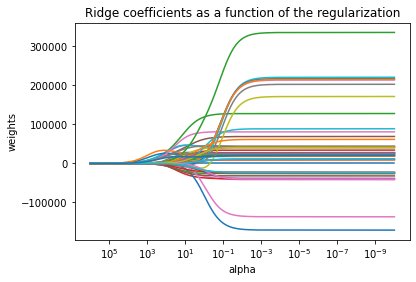

In [119]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [120]:
MSE_train = []
MSE_test = []
coefs = []
n_alphas = 500
alphas = np.logspace(-5,2,n_alphas)

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_rfe2,y_train)
    coefs.append(lasso.coef_)

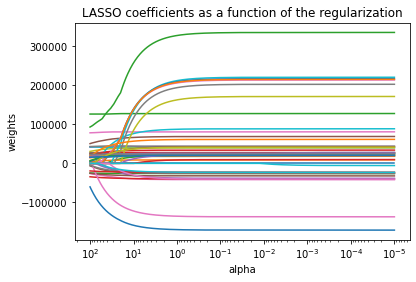

In [121]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [122]:
MSE_train_Ridge=[]
MSE_test_Ridge=[]
MSE_train_Lasso=[]
MSE_test_Lasso=[]

n_alphas = 100
alphas = np.logspace(-1, 2, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_rfe2, y_train)
    
    y_pred_train = ridge.predict(X_train_rfe2)
    MSE_train_Ridge.append(r2_score(y_train,y_pred_train))
    y_pred_test = ridge.predict(X_test)
    MSE_test_Ridge.append(r2_score(y_test,y_pred_test))

<AxesSubplot:>

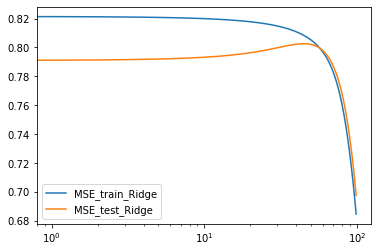

In [123]:
Results = pd.DataFrame({'MSE_train_Ridge':MSE_train_Ridge,"MSE_test_Ridge":MSE_test_Ridge})
Results.plot(legend=True,logx=True)

In [125]:
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_rfe2, y_train)
    y_pred_train = lasso.predict(X_train_rfe2)
    MSE_train_Lasso.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test_Lasso.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

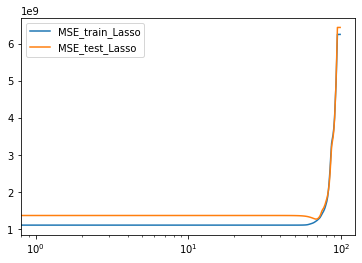

In [126]:
Results = pd.DataFrame({'MSE_train_Lasso':MSE_train_Lasso,"MSE_test_Lasso":MSE_test_Lasso})
Results.plot(legend=True,logx=True)

## Double the lambda

In [127]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe2, y_train)
print(ridge.coef_)

[     0.          10596.66848241  81015.53848359  17764.22470896
  46340.30693953  41031.55798986 -13141.6416956   27758.75181188
  17232.57703945  46251.43894492  20695.25671675  25372.66079904
   5487.78395825 -27402.2185148   -5394.96604883  22259.34171535
  66034.8460486   37164.97538792  21846.30295652   7549.41683666
 -14337.42405406   4291.94557415 -19872.19139268  12433.32000662
  -4514.65726534 -23095.35620394  -7614.81334154    -94.31898698
  -4340.45915401   -591.57181562  -3119.57168392   3459.58254863
  32910.58549051   1940.21704179   1338.65852498  -8221.64621768
  -6810.92058926  -6346.9719781   13613.56523786   1338.65852498
   7456.40672827  15149.48951756   6199.29784286 -15121.40734853
  12405.45954829   7282.35314371  -1225.31710392  23829.13750311
   7506.4460435   -5738.27817217  16709.64061672]


In [128]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe2)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7892554491353276
0.7922168632644905
1344697502698.5486
585680931111.8745
1317039669.6361885
1337171075.597887


In [130]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe2, y_train)

Lasso(alpha=200)

In [131]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe2)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7937080098902349
0.7938854757070173
1316287053635.1133
580977592311.8259
1289213568.6925693
1326432859.15942
